## Question3 (4 points):

In class, we briefly discussed bootstrapping. We will look at it further in this exercise. Bootstrapping typically refers to a method to estimate a quantity of a population. (Though it sometimes also refers to permutation tests (also known as suffling labels), which we will not discuss in this exercise.) This is done by repeatedly taking what are often small samples, calculating some statistic, and taking the average of that statistic. We can summarize this procedure as follows:

1.  Choose a number of bootstrap samples to perform
2.  Choose a sample size
3.  For each bootstrap sample
   
   a.  Draw a sample **with replacement** with the chosen size

   b.  Calculate the desired statistic on the sample
4.  Calculate some statistics over the calculated sample statistics.

Below we will develop code for bootstrapping.





In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


a. Develop a function that takes a dataset and generates a new dataset from it. The new dataset samples from the original dataset with replacement. In this case, the new dataset should have an equal number of samples to the original one. (Hence, in this case, the sample we take is not small; it is the same size as the entire dataset.)

In [ ]:
def bootstrap_dataset(X,y):
  y = y.reshape((y.shape[0],1))
  data = np.concatenate((y, X),axis=1)
  bootstrap = data[np.random.choice(data.shape[0], size=data.shape[0], replace=True),:]
  return (bootstrap[:,1:], bootstrap[:,0])

b. Use the function you developed in (a) and bootstrap the following dataset (X, y) 1000 times. Each time, calculate the $R^2$ of the linear-regression fit to the bootstapped dataset. 

In [ ]:
(X,y) = datasets.make_regression(n_samples=1000, n_features=10, n_informative=5, bias=10, noise=100, random_state=101)
r_squared = []
for _ in range(1000):
  (X_temp,y_temp) = bootstrap_dataset(X,y)
  r_squared.append(sm.OLS(y_temp,sm.add_constant(X_temp)).fit().rsquared)

c. Plot a histogram for the 1000 $R^2$ results you got in (b). Calculate the $R^2$ of the original dataset and add a vertical line for that $R^2$ to the histogram.

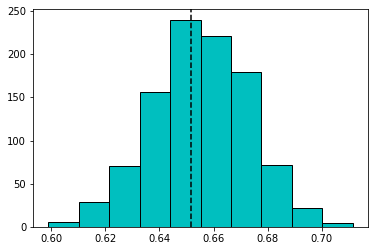

In [ ]:
plt.hist(r_squared, color="c", edgecolor="k")
original_r_squared = sm.OLS(y,sm.add_constant(X)).fit().rsquared
plt.axvline(original_r_squared, color="k", linestyle="dashed")

d. (Bonus question) In (b) we calculated the empirical distribution of $R^2$ of the bootstapped datasets. Based on that and on what you learned from the histogram in (c), can you think of a way to use this collection of $R^2$s to calculate whether the $R^2$ of the original dataset is significantly larger than 0? 





One way you can determine if the $R^2$ of the original dataset was siginifcant is by finding its Z-score. This is done by finding the mean of the collection of $R^2$ values and comparing it with the original $R^2$. This is done by subtracting the value by the mean divided by the standard deviation as shown below. If the $R^2$ is to be significant, the Z-score should be greater than 1.645 which is clearly not the case.


In [ ]:
import statistics
mean = sum(r_squared)/len(r_squared)
stdev = statistics.pstdev(r_squared)
z_score = (original_r_squared-mean)/stdev
z_score

-0.19979840839868598

##Question4 (2 points):

We learned about k-fold cross validation in class. Say that you run 10-fold cross validation on a dataset. For each fold, you would get a model (e.g, $\hat \beta_0, ..., \hat \beta_p$ for linear regression). And you can compute the $R^2$ of each fold—say, $R^2_1, ..., R^2_{10}$. Now, the accuracy that your 10-fold cross-validation procedure would predict on the unseen test set is $\bar{R^2}=\frac{1}{10}\sum_{i=1}^{10}{R^2_i}$. However, how would you determine which model to use on the test set? Suggest an idea and explain why you think it would work. 

One way to determine which model to use could be to use the model that achieves the median $R^2$ value. This should work well because this value should be very close to $\bar{R^2}$ which represents the most likely performance in predicting on any test set. The reason for not choosing the model with the largest $R^2$ is because the model most likely got lucky with the split it was training on, making it a rather optomistic model. Rather, the model with the median $R^2$ should correlate with a more realistic split making it the better model.